In [69]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2
import heapq
import math
from skimage import data
from sklearn.cluster import KMeans

(512, 512)


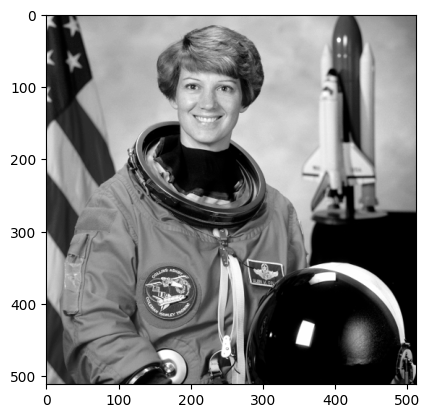

In [36]:
im = data.astronaut()
im = np.dot(im[:,:,:3], [0.2989, 0.5870, 0.1140])
print(im.shape)
plt.imshow(im, cmap='gray')
plt.show()

In [62]:
lst_k = [2, 4, 8, 16, 32, 64]
rows, cols = im.shape
im2 = im.copy()
im2 = im2.reshape(rows*cols)
im2 = np.vstack((im2, np.zeros_like(im2))).T

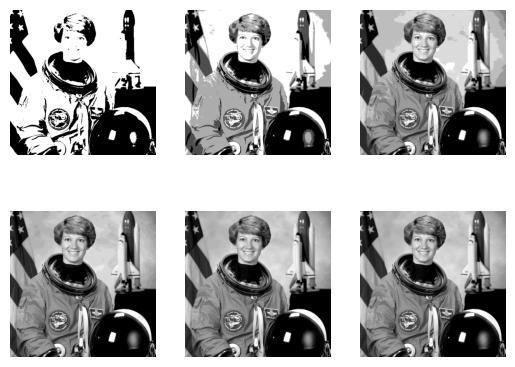

In [91]:
for i, k in enumerate(lst_k):
    plt.subplot(2, 3, i + 1)
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(im2)
    out = np.zeros_like(im)
    lbls = kmeans.labels_.reshape(im.shape)
    for val in range(k):
        out[lbls == val] = np.round(np.mean(im[lbls == val]))
    plt.imshow(out, cmap='gray')
    plt.axis('off')

plt.show()

Nos quedamos con el último `out` que tiene 64 colores

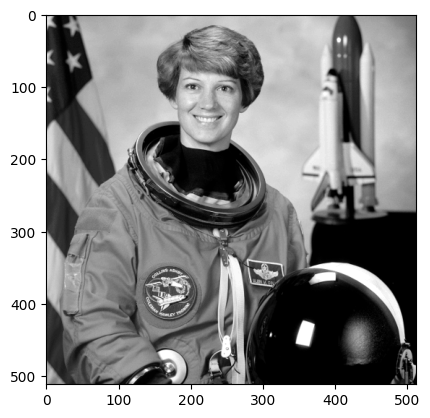

In [40]:
plt.imshow(out, cmap='gray')
plt.show()

In [92]:
np.max(out)

np.float64(254.0)

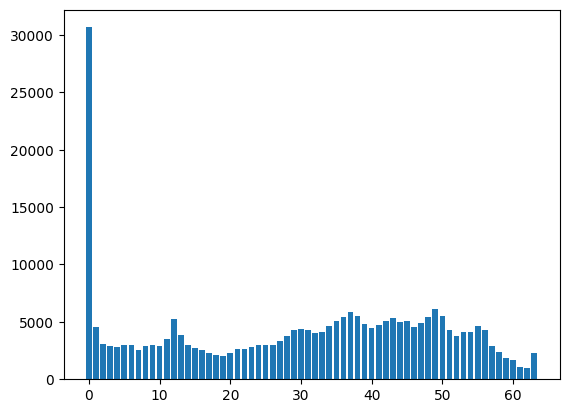

In [96]:
unique = np.unique(out)
for i, u in enumerate(unique):
    out[out == u] = i
n = len(unique)
pixels = out.flatten().astype(int)
bins = np.bincount(pixels, minlength=n)
plt.bar(range(n), bins)
plt.show()

In [97]:
freq = bins / (rows * cols)
print(np.sum(freq))

1.0


In [65]:
class Node:
    def __init__(self, symbol=None, frequency=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(chars, freq):

    # Create a priority queue of nodes
    priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        left_child = heapq.heappop(priority_queue)
        right_child = heapq.heappop(priority_queue)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]

def generate_huffman_codes(node, code="", huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        generate_huffman_codes(node.left, code + "0", huffman_codes)
        generate_huffman_codes(node.right, code + "1", huffman_codes)

    return huffman_codes

In [98]:
chars = list(range(64))

# Build the Huffman tree
root = build_huffman_tree(chars, freq)

# Generate Huffman codes
huffman_codes = generate_huffman_codes(root)

# Print Huffman codes
for char, code in huffman_codes.items():
    print(f"Character: {char}, Code: {code}")

Character: 55, Code: 101110
Character: 7, Code: 1101110
Character: 37, Code: 00001
Character: 2, Code: 001111
Character: 10, Code: 000101
Character: 24, Code: 000110
Character: 25, Code: 000111
Character: 8, Code: 000001
Character: 27, Code: 010000
Character: 4, Code: 1111110
Character: 14, Code: 001011
Character: 48, Code: 111011
Character: 5, Code: 001010
Character: 28, Code: 010011
Character: 59, Code: 0100011
Character: 57, Code: 000000
Character: 11, Code: 010010
Character: 29, Code: 100011
Character: 13, Code: 010101
Character: 1, Code: 101010
Character: 51, Code: 100100
Character: 0, Code: 011
Character: 9, Code: 001000
Character: 26, Code: 001001
Character: 61, Code: 01011001
Character: 58, Code: 1100100
Character: 62, Code: 01011000
Character: 60, Code: 0100010
Character: 19, Code: 0101101
Character: 32, Code: 010111
Character: 52, Code: 010100
Character: 33, Code: 100010
Character: 50, Code: 111101
Character: 31, Code: 100101
Character: 30, Code: 100111
Character: 54, Code: 1

In [99]:
-np.sum(freq * np.log2(freq))

np.float64(5.724047282029897)

In [104]:
total_bits = 0
for char, code in huffman_codes.items():
    total_bits += len(code)*bins[char]
print(f"Total bytes: {total_bits / 8}")

Total bytes: 188579.25


In [105]:
512*512

262144

In [106]:
512*512*0.75

196608.0